## House Price Prediction

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
boston_dt = load_boston()
x = boston_dt.data  # Independent Variables
y = boston_dt.target # Target Variables (To learn/predict)

In [3]:
bos_df = pd.DataFrame(x)

In [5]:
bos_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
column_names = { 0:'CRIM', 1: 'ZN', 2: 'INDUS', 3: 'CHAS', 4: 'NOX', 5: 'RM', 6: 'AGE', 7: 'DIS', 8: 'RAD',9:  'TAX', 10: 'PTRATIO', 11: 'B',12:  'LSTAT'}
bos_df['MEDV'] = y

# Description of Column Names
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [11]:
bos_df = bos_df.rename(columns= column_names )

In [12]:
#This will summarize the data (mean, std, min, max, quartiles of individual columns)
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


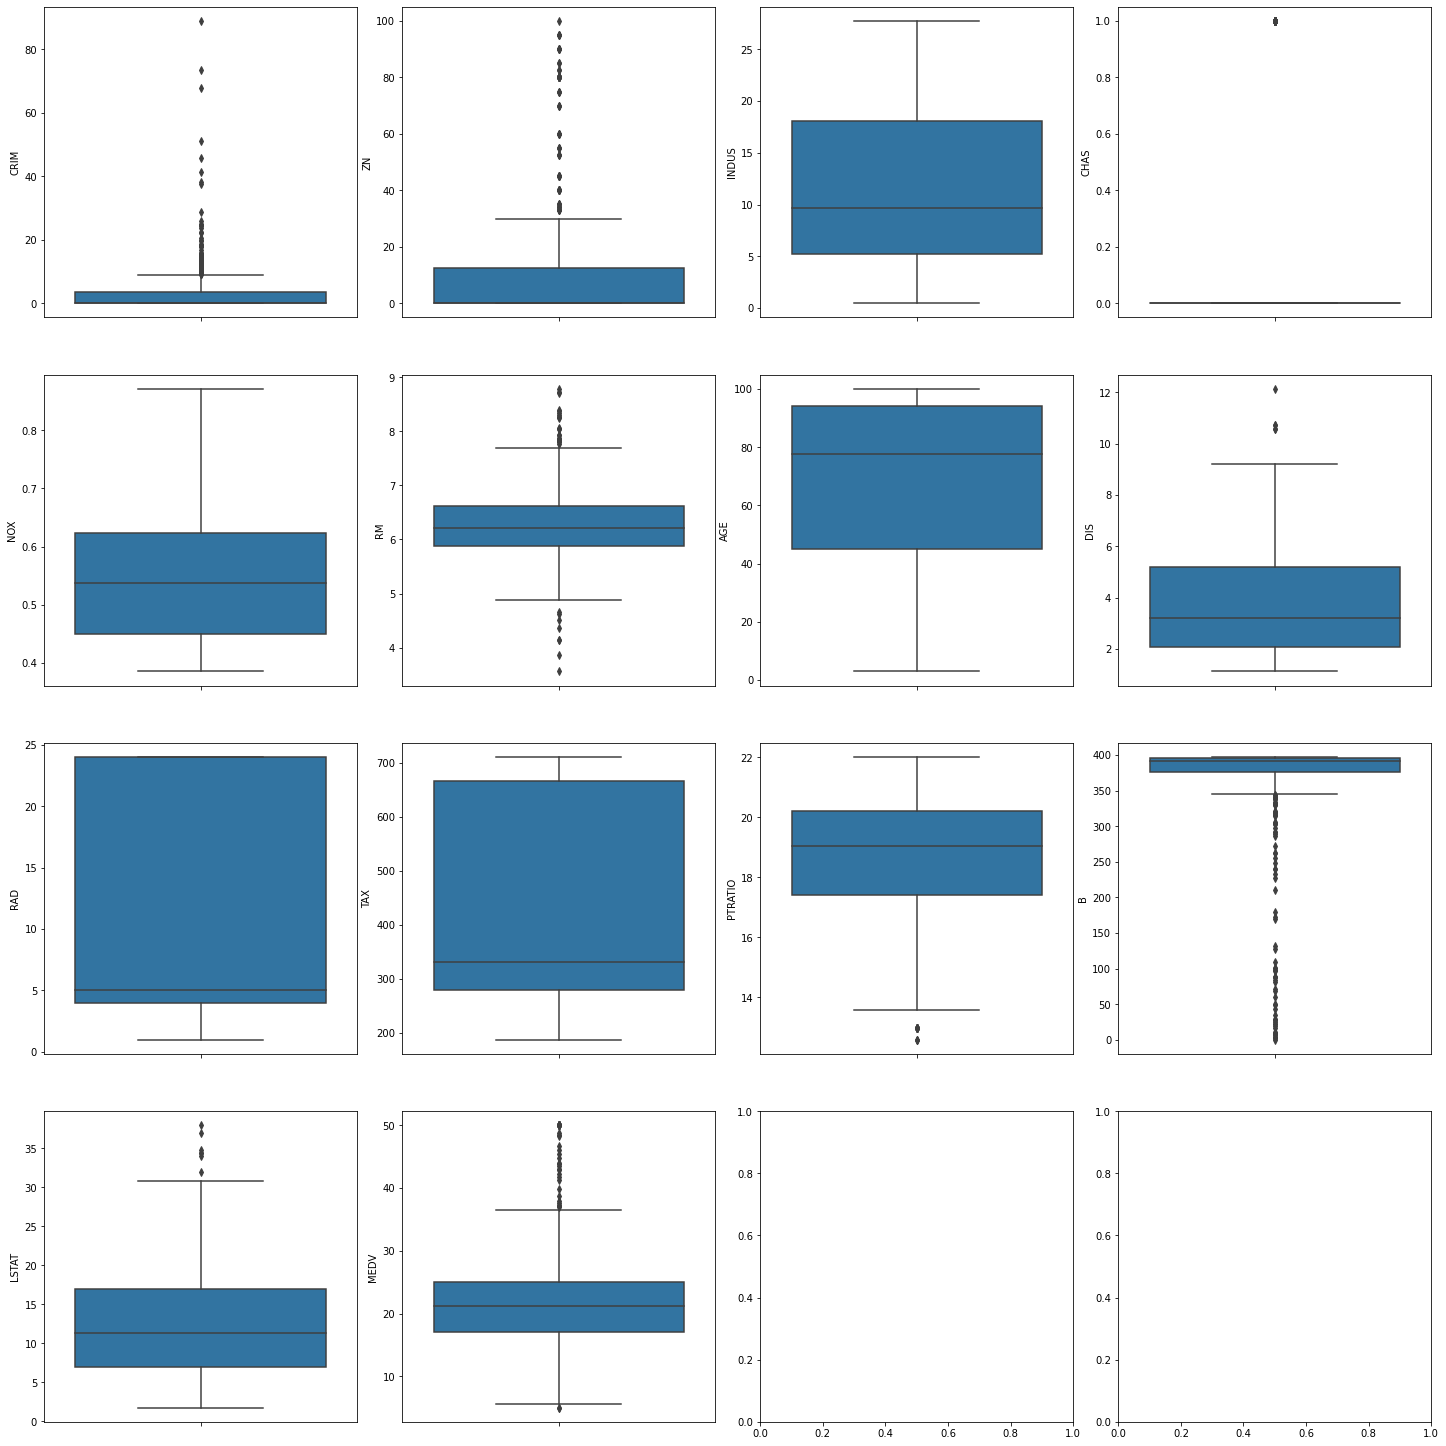

In [14]:
fig_1, axs = plt.subplots(ncols = 4, nrows = 4 , figsize = (20, 20))
index = 0
axs = axs.flatten()
for k, v in bos_df.items():
    sns.boxplot(y= k, data = bos_df, ax = axs[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad = 5)

# Observations from the above data
1: CRIM & CHAS have low data variance (or huge outlier(s))
2: CRIM, SN, RM, & B have outliers.     

In [15]:
# Calculating the outlier percentage
for k, v in bos_df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1 
    v_col = v[(v <= q1 - 1.5*iqr) | (v>= q3 + 1.5*iqr)]
    perc = np.shape(v_col)[0]*100.0 /np.shape(bos_df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [16]:
#Before proceeding further, we'll remove the outliers in MEDV

In [17]:
bos_df = bos_df[~(bos_df['MEDV'] >= 50.0)] # The values in MEDV seem to be censored at 50.00 and therefore, the max values won't be helpful

In [18]:
np.shape(bos_df)

(490, 14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

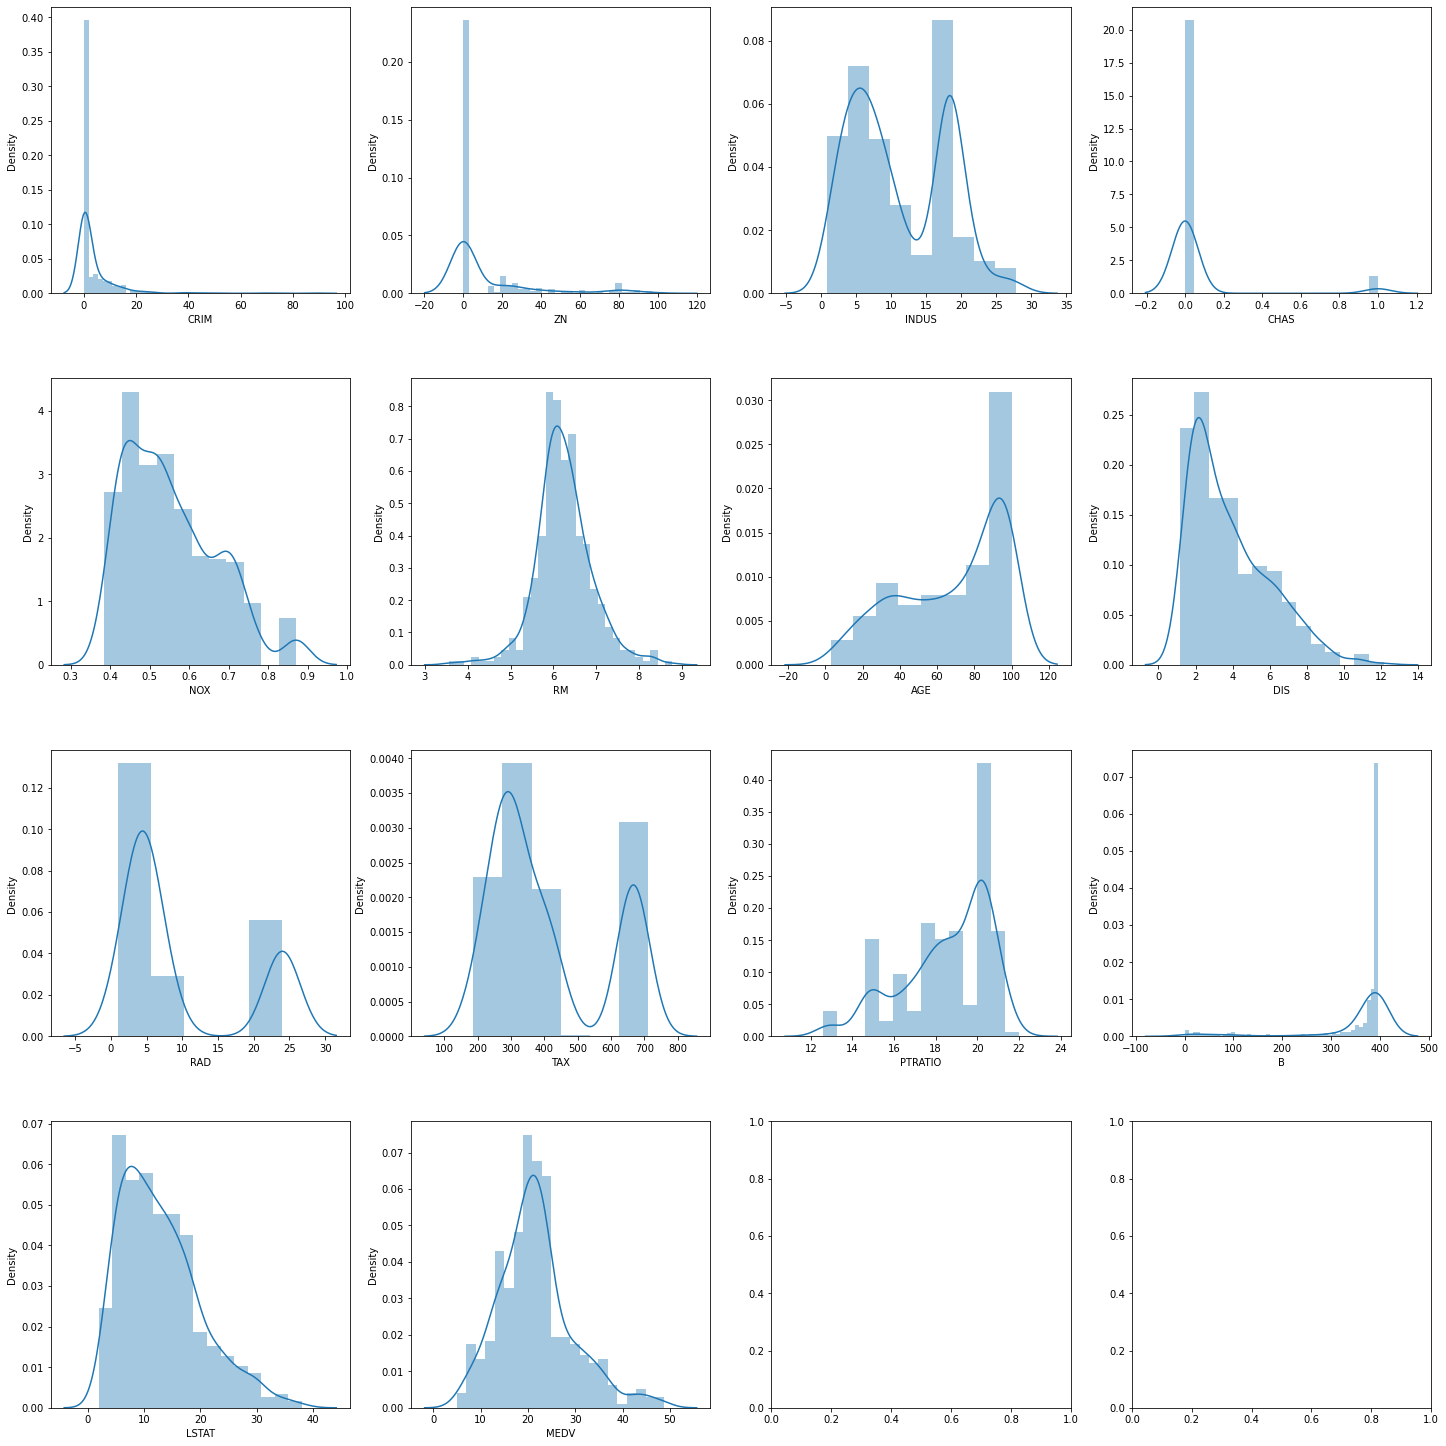

In [20]:
# Checking to see how the distributions look like now
fig, axs = plt.subplots (ncols=4, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in bos_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


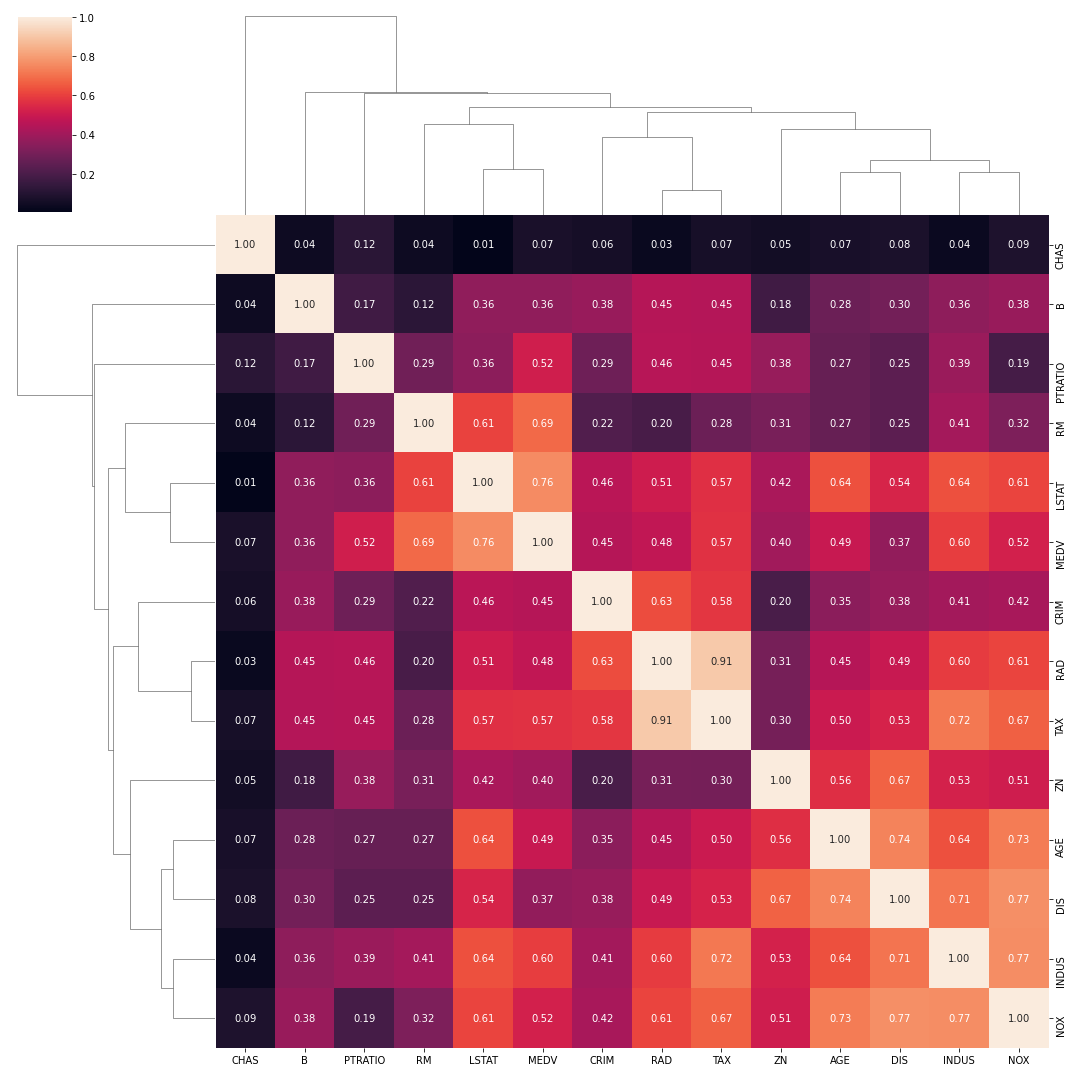

In [22]:
#plt.figure(figsize=(20,10))
sns.clustermap(bos_df.corr().abs(), annot = True, fmt = '.2f', figsize = (15, 15))


In [25]:
# INDUS, NOX, RM, LSTAT, TAX, AGE & PTRATIO have high correlation with target (>0.5), indicating they are good features to start with
from sklearn.preprocessing import MinMaxScaler

#Scaling the columns
scaler = MinMaxScaler()
select_columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x1 = bos_df.loc[:, select_columns]
y1 = bos_df['MEDV']
bos_df[select_columns] = scaler.fit_transform(x1)

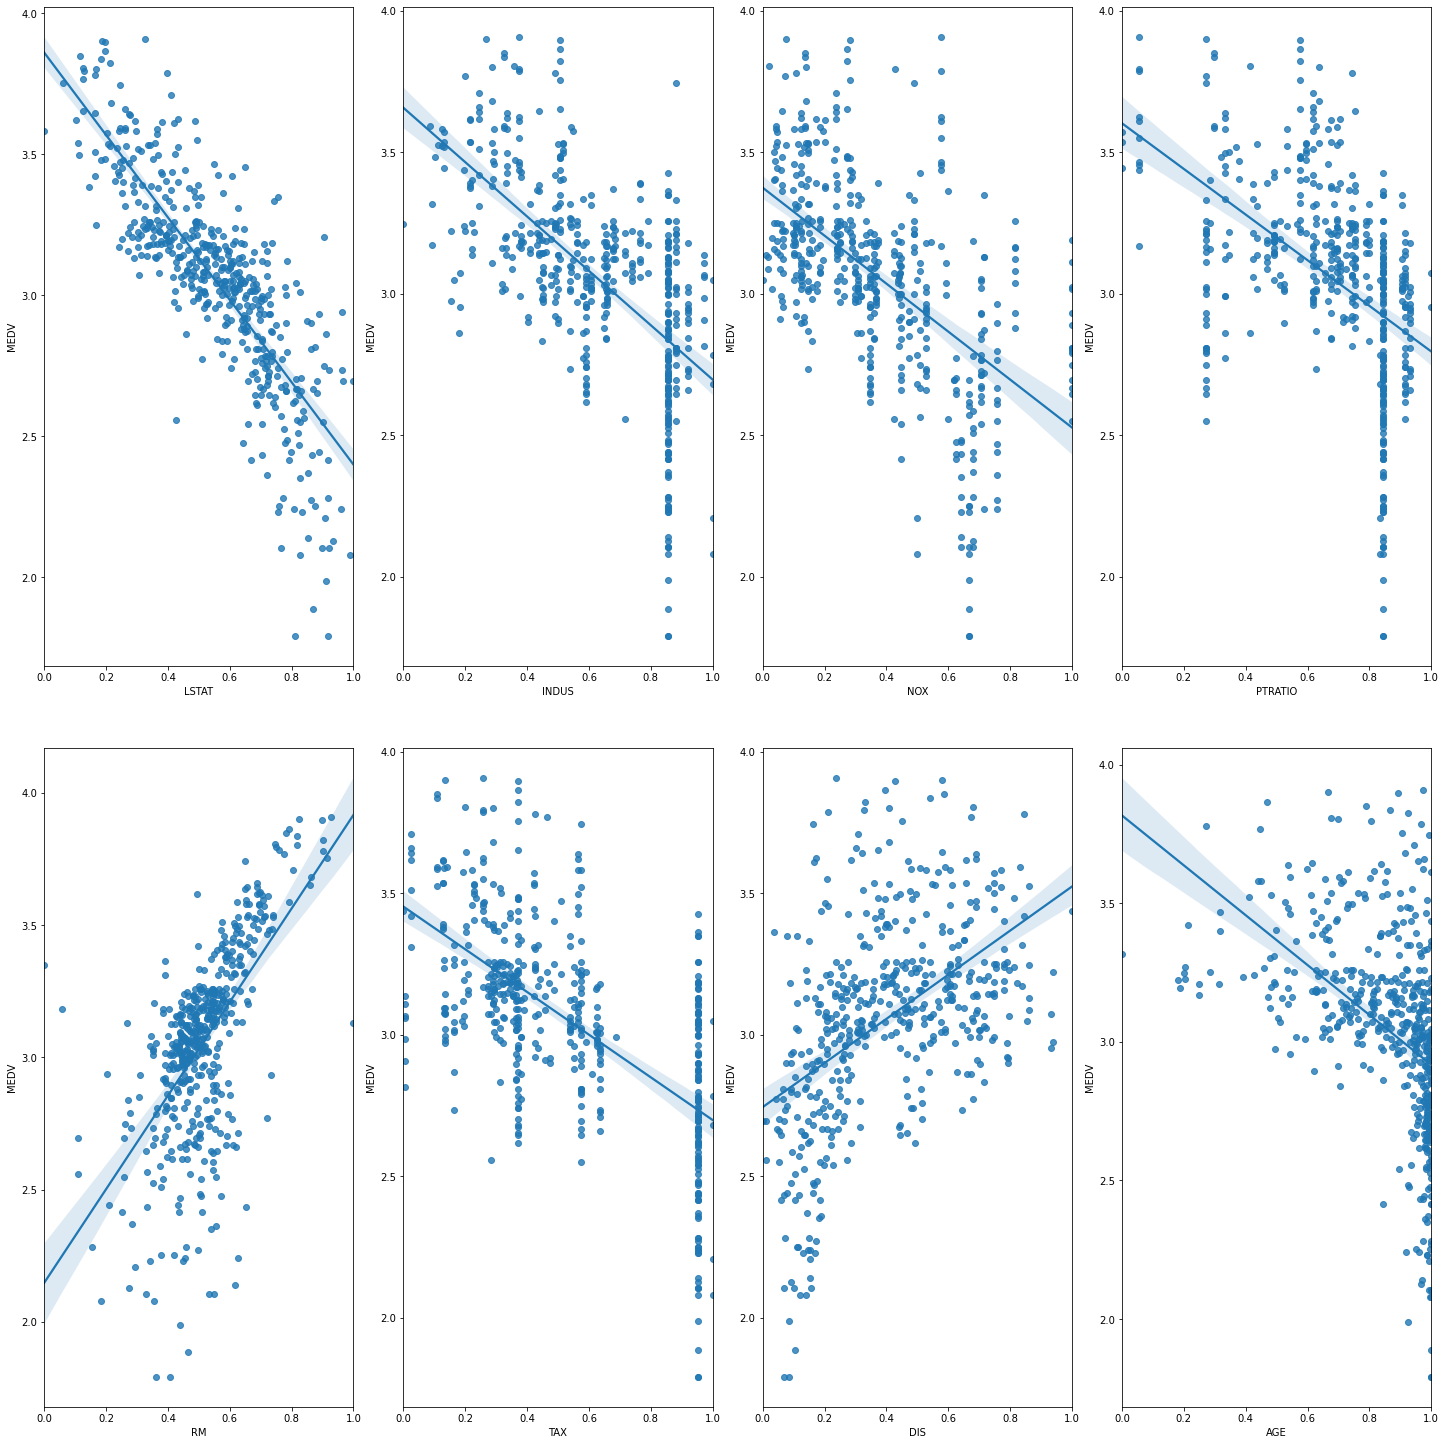

In [26]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize= (20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(select_columns):
    sns.regplot(y=y1, x=bos_df[k], ax = axs[i])
    
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad =5)

In [27]:
y = np.log1p(y)
for col in bos_df.columns:
    if np.abs(bos_df[col].skew())>0.3:
        bos_df[col] = np.log1p(bos_df[col])

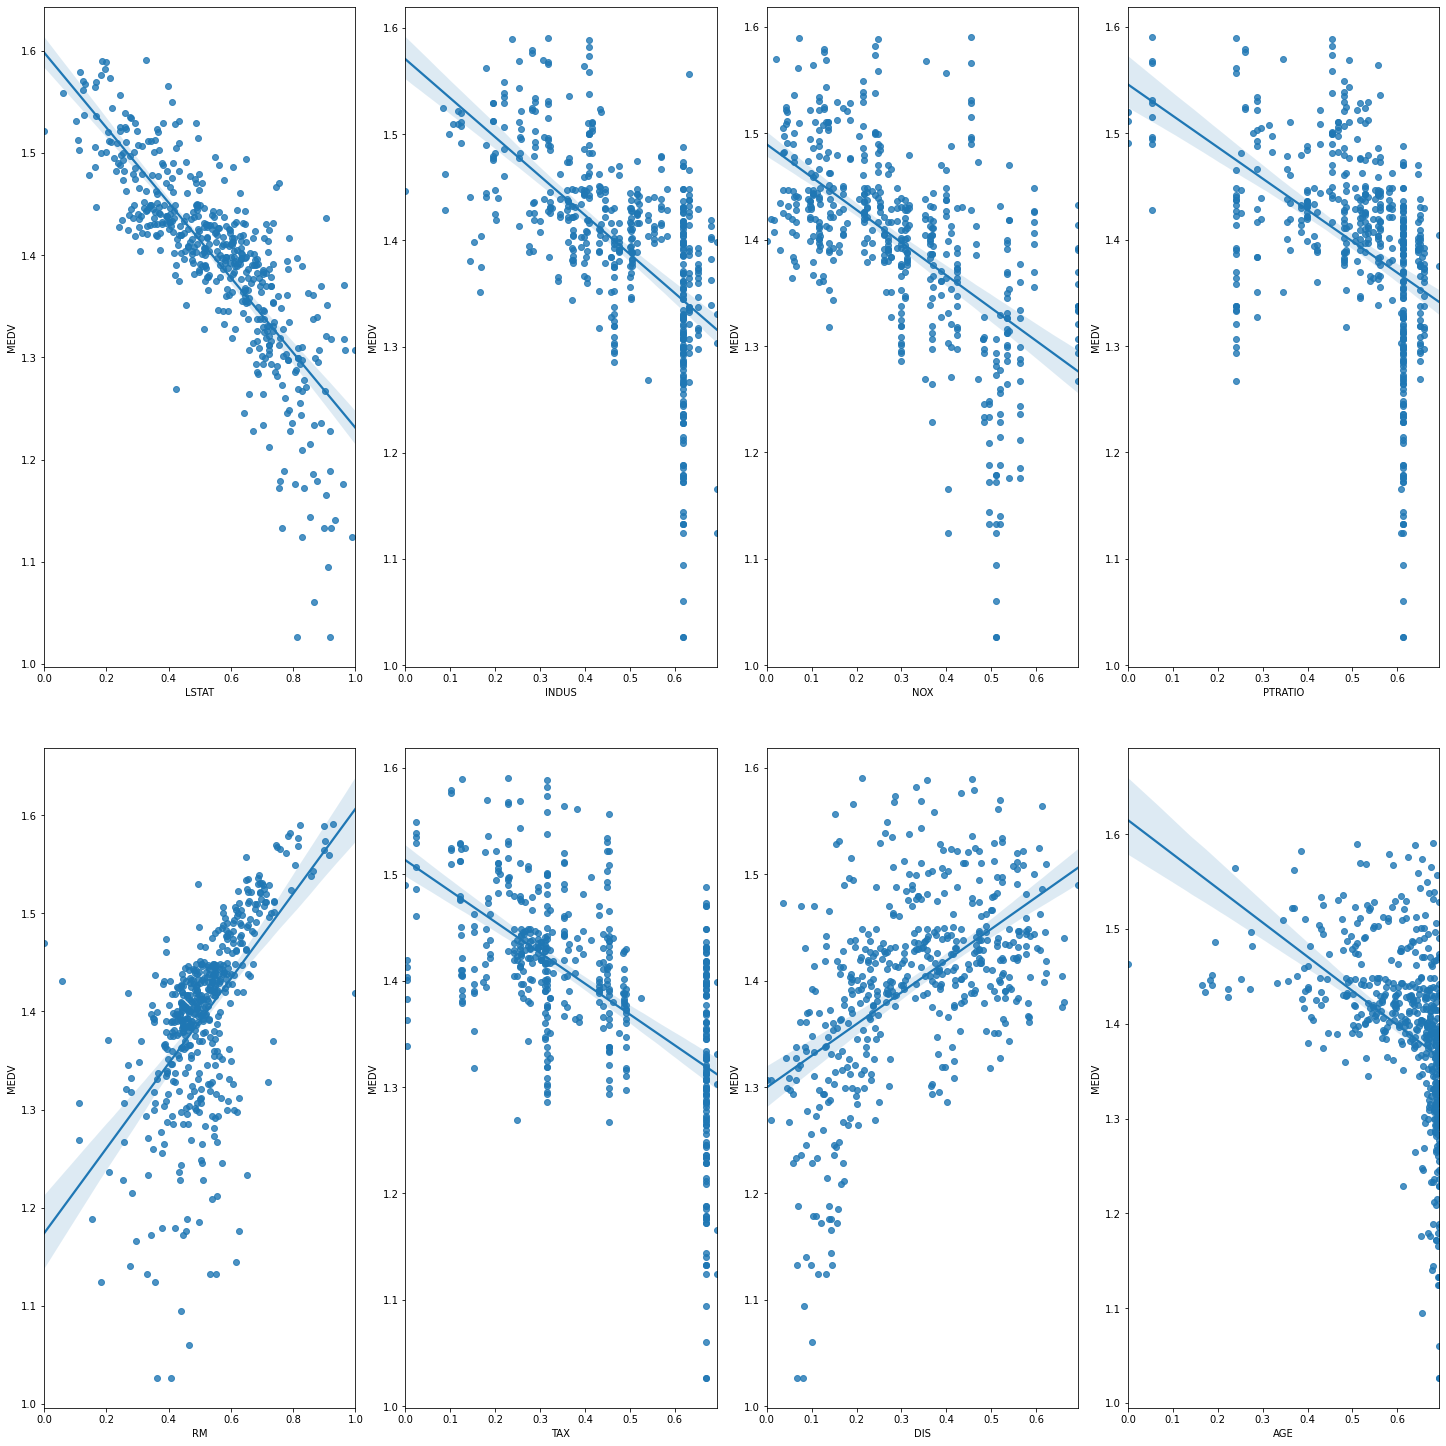

In [28]:
#Plotting the data again after applying log transformation to reduce skewness
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize= (20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(select_columns):
    sns.regplot(y=y1, x=bos_df[k], ax = axs[i])
    
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad =5)

 Mean Squared Error: -0.00 (+/- 0.00)


LinearRegression()

### Testing out SVM Classifier's Performance

In [72]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Test/Train Split!
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size = 0.3)

scaler_1 = StandardScaler()

#Scaling the Data
x_tr = scaler_1.fit_transform(x_tr)
x_tst= scaler_1.transform(x_tst)

svr = SVR()
svr.fit(x_tr, y_tr)


SVR()

In [73]:
# Prediction 
predict_1 = svr.predict(x_tst)
mean_squared_error(y_tst, predict_1)

0.002614299288610807

### Let's try out different Classifier's and compare their performance!

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

x = bos_df.loc[:, select_columns]
y = bos_df['MEDV']
kf = KFold(n_splits= 10)
x_sc = scaler.fit_transform(x)


## Linear Regression

In [83]:

l_regression = linear_model.LinearRegression()
scr = cross_val_score(l_regression, x_sc, y, cv= kf, scoring = 'neg_mean_squared_error')
print(" Mean Squared Error: %0.4f (+/- %0.4f)" % (scr.mean(), scr.std()))
l_regression.fit(x_sc, y)

 Mean Squared Error: -0.0030 (+/- 0.0032)


LinearRegression()

In [85]:
scr_map = {}
scr_map['LinearRegression'] = scr
l_ridge = linear_model.Ridge()
scr_1 = cross_val_score(l_ridge, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['Ridge'] = scr_1
print("MSE: %0.4f (+/- %0.4f)" % (scr_1.mean(), scr_1.std()))

MSE: -0.0029 (+/- 0.0032)


## Polynomial Ridge Regression

In [87]:
# Polinomial regression with L2 regularization with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['PolyRidge'] = scores
print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

MSE: -0.0022 (+/- 0.0022)


### SVM

In [88]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_sc, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['SVR'] = scores
print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

MSE: -0.0047 (+/- 0.0019)


### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_sc, y)
print("Best classifier :", grid_sv.best_estimator_)


Best classifier : DecisionTreeRegressor(max_depth=4)


In [43]:
scores = cross_val_score(desc_tr, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.00 (+/- 0.00)


### K Nearest Neighbour Classifier

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_sc, y)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : KNeighborsRegressor()


In [93]:
knn = KNeighborsRegressor(n_neighbors=6)
scores = cross_val_score(knn, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.0030 (+/- 0.0021)


### Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_sc, y, cv=kf, scoring='neg_mean_squared_error')
scr_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.00 (+/- 0.00)


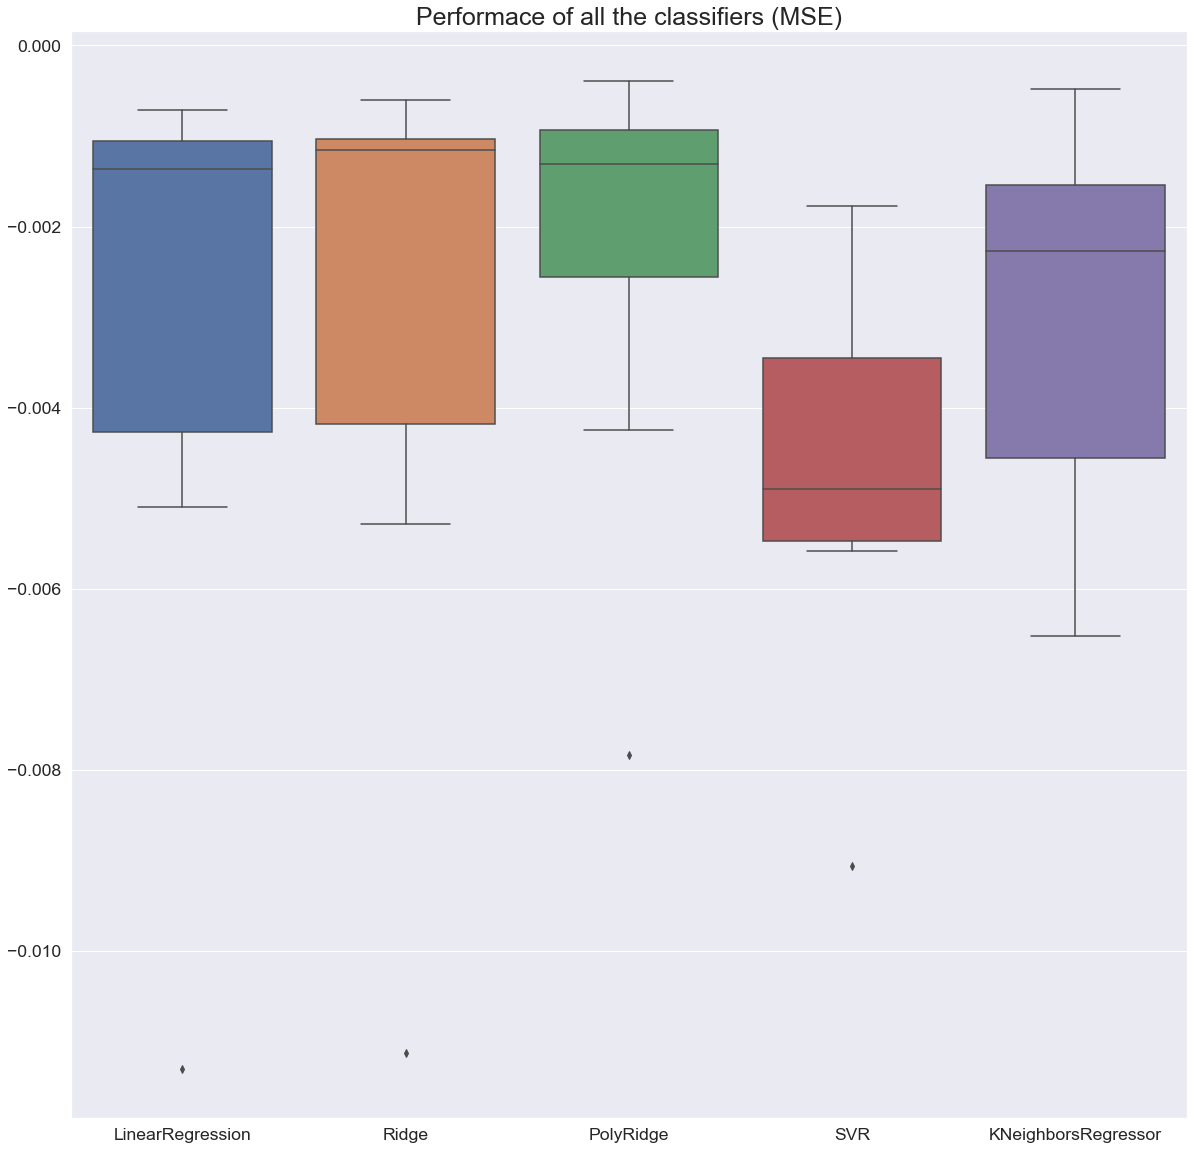

In [104]:
plt.figure(figsize=(20, 20))
scr_map = pd.DataFrame(scr_map)
sns.set(font_scale=1.6)
plt.title("Performace of all the classifiers (MSE)", fontsize = 25)
sns.boxplot(data=scr_map)
plt.show()